# Precipitation & Temperature

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [3]:
path = "/Users/Administrator/Documents/University/Year 3/2b/Thesis/Bachelor-Thesis/data/clean/environment/environment.csv"
env_df = pd.read_csv(path)

In [6]:
print(f"Number of datapoints: {len(env_df)}")
env_df.isna().sum()

Number of datapoints: 3348


station       0
temp_mean     0
precip_sum    0
Date          0
dtype: int64

In [16]:
env_df["temp_mean"] = env_df["temp_mean"] / 10
env_df["precip_sum"] = env_df["precip_sum"] / 10

In [17]:
env_df["Date"] = pd.to_datetime(env_df["Date"])
env_df["YearMonth"] = env_df["Date"].dt.to_period("M")

In [18]:
monthly_avg = env_df.groupby(env_df["Date"].dt.month).agg({
    "temp_mean": "mean",
    "precip_sum": "mean"
}).rename(index={1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 
                 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

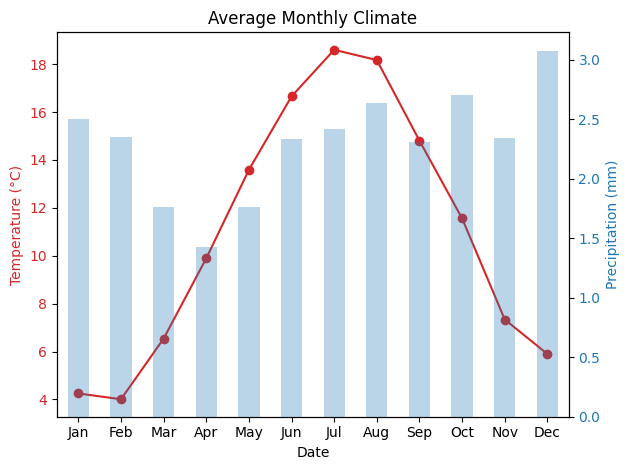

In [19]:
fig, ax1 = plt.subplots()

ax1.set_title("Average Monthly Climate")
ax1.set_xlabel("Month")
ax1.set_ylabel("Temperature (°C)", color="tab:red")
monthly_avg["temp_mean"].plot(kind="line", ax=ax1, color="tab:red", marker="o")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.set_ylabel("Precipitation (mm)", color="tab:blue")
monthly_avg["precip_sum"].plot(kind="bar", ax=ax2, alpha=0.3, color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.xticks(ticks=range(12), labels=monthly_avg.index, rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
env_df.set_index("Date", inplace=True)

## ACF

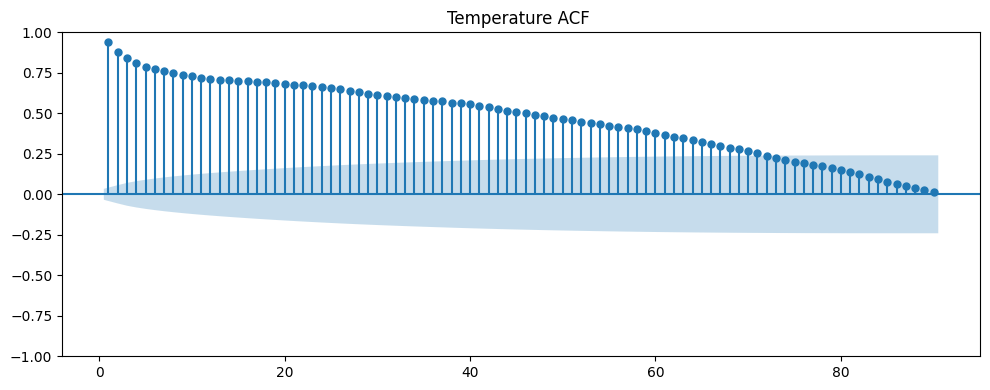

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plot_acf(env_df["temp_mean"], lags=90, ax=ax, zero=False)
ax.set_title(f"Temperature ACF ")
plt.tight_layout()
plt.show()

In [50]:
acf_vals, confint = acf(env_df["temp_mean"], nlags=90, alpha=0.05, fft=False)

acf_vals = acf_vals[1:]
confint = confint[1:]

for lag, (val, (low, high)) in enumerate(zip(acf_vals, confint), start=1):
    if low < 0 and high > 0:  # Contains 0 ⇒ insignificant
        print(f"First insignificant autocorrelation at lag {lag}")
        break

First insignificant autocorrelation at lag 72


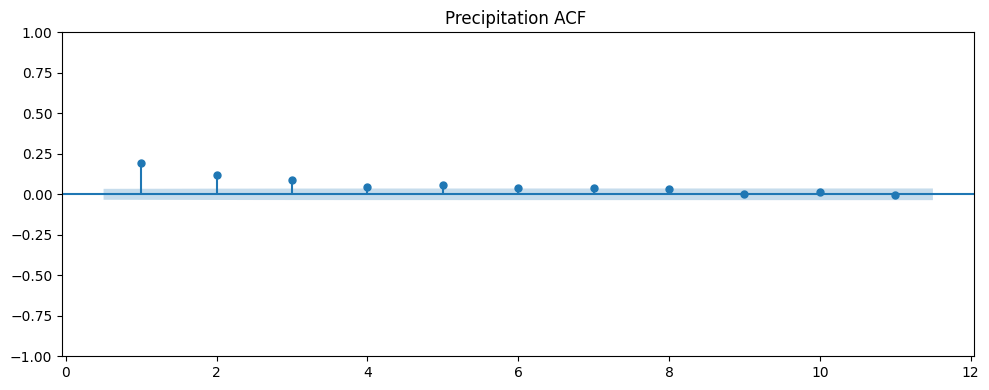

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plot_acf(env_df["precip_sum"], lags=11, ax=ax, zero=False)
ax.set_title(f"Precipitation ACF ")
plt.tight_layout()
plt.show()

In [51]:
acf_vals, confint = acf(env_df["precip_sum"], nlags=90, alpha=0.05, fft=False)

acf_vals = acf_vals[1:]
confint = confint[1:]

for lag, (val, (low, high)) in enumerate(zip(acf_vals, confint), start=1):
    if low < 0 and high > 0:
        print(f"First insignificant autocorrelation at lag {lag}")
        break

First insignificant autocorrelation at lag 6


## PACF

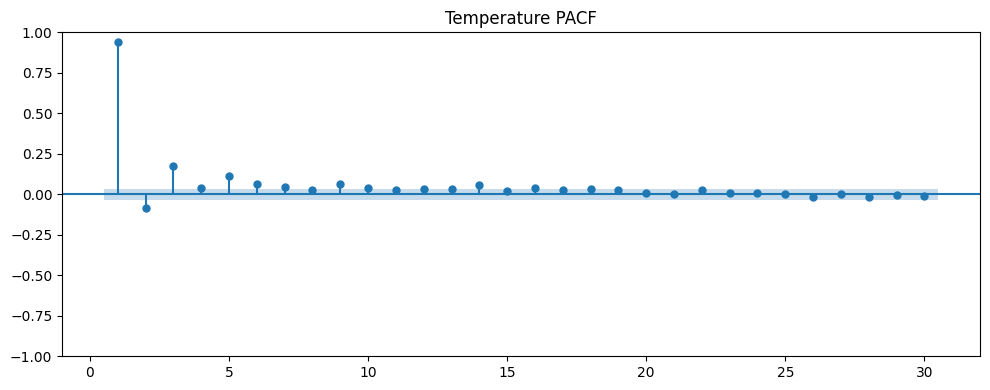

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plot_pacf(env_df["temp_mean"], lags=30, ax=ax, zero=False, method="ywm")
ax.set_title(f"Temperature PACF")
plt.tight_layout()
plt.show()

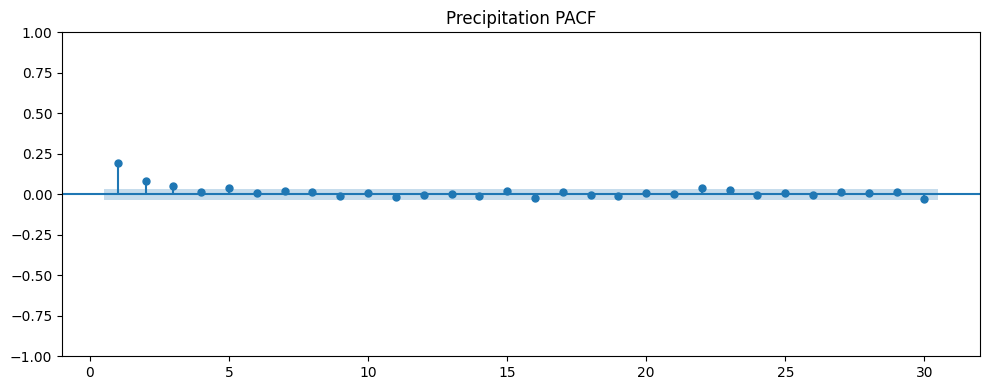

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
plot_pacf(env_df["precip_sum"], lags=30, ax=ax, zero=False, method="ywm")
ax.set_title(f"Precipitation PACF")
plt.tight_layout()
plt.show()